In [328]:
# -------- Code Outline -------- #
# Code finds the length of RR peaks from the 
# Peak finding algorithm ie. distance between
# Consecutive RR peaks. This is then plotted
# Against the number RR interval respectively
# The plot has two different colours representing either
# AF or non-AF beats,  we use it for RNN In order to do this
# We also add a label array which tells us if each RR interval is AF or not

import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [329]:
# -------- Loader -------- #
# Loads in the peak arrays we got from Pan-Tompkins algorithm

# Load in the peak arrays

with open('Peak Arrays From Pickus/1_Pickus_R_Peaks.pkl', 'rb') as f:
    Data = pickle.load(f)

In [330]:
# -------- Load In Doctor Annotations -------- #
# Now we need to create a plot with different colours representing different
# AF or non-AF patients. Therefore import the label arrays along with their corresponding
# Label annotations from the original raw data. These labels were put on by a medical
# Professional upon analysis

with open('RR Interval Labels/4015_labels.pkl', 'rb') as f:
    Labels = pickle.load(f)
with open('RR Interval Labels/4015_labels_string.pkl', 'rb') as f:
    Labels_value = pickle.load(f)

In [331]:
# -------- Adjust Label Array -------- #
# We need to adjust the label array based on how the Pan-
# Tompkins algorithm works. This is because the Pan-Tompkins
# Algorithm uses a 'learning phase' that learns from the first 3 peaks
# As a result these peaks aren't saved in the peak array and need to be ignored

print(Labels)
print(Labels_value)

# Now we need to remove the labels before the first R peak in the peak array
# We also need to make note of the final label in the array as this will tell us
# What every sequential beat afterwards is (until the next label noting a change)

# Save 'initial' rhythm
initial_rhythm = None 

for k,label_position in enumerate(Labels):
    if (label_position < Data[0]):
        # This is the new initial rhythm
        initial_rhythm = Labels_value[k]
        Labels = np.delete(Labels, k)
        Labels_value = np.delete(Labels_value, k)

print(Labels)
print(Labels_value)
print(initial_rhythm)
print(len(Data))

[     30  102584  119604  121773  122194  133348  166857 1096245 1098054
 1135296 1139595 1422436 1423548 1459277 1460416]
['(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N', '(AFIB', '(N']
[ 102584  119604  121773  122194  133348  166857 1096245 1098054 1135296
 1139595 1422436 1423548 1459277 1460416]
['(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB' '(N' '(AFIB'
 '(N' '(AFIB' '(N']
(N
44445


44255
44255
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

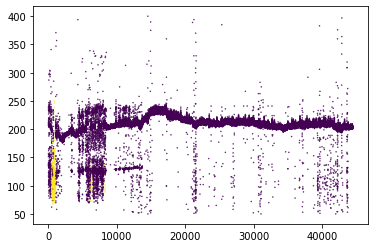

In [332]:
# -------- Find Lengths -------- #
# Find lengths of RR peaks and save them
# Into an array, also save them with their
# Respective index of RR interval. We then need to colour code
# Based on if these intervals contained an AF beat or not.
# Do this by saving a separate truth array which tells us if any beat within
# That interval is AF or not. 1 being AF present, 0 being no AF beats present

AF_truth_array = []

RR_interval_index = []
RR_length = []

for i,peak in enumerate(Data):
    
    # Append the distance between consecutive peaks until you reach the final peak
    # Append the index of the RR interval
    if (i != 0):
        
        length = (Data[i] - Data[i - 1])
        
        # Now we don't want to append any lengths that are due to erroneous R peak
        # IE. where the R peak detector has gone wrong and detected something other than
        # An R peak. These 'false' values will give us a bad scatter plot
        # Only allow RR intervals in an accepted range 50-400
        
        if ((length >= 50) and (length <= 400)):
        
            RR_length.append(length)
            RR_interval_index.append(i)
            # Now we have the length find if the peaks are within an AF interval
            # Loop over all the labels to find which interval the peak is contained in
            # And if this interval contains AF or not
            
            # If there is only one label and it is before the first 3 peaks then
            if (len(Labels) == 0):
                    if (initial_rhythm == "(N"):
                        AF_truth_array.append(0)
                    else:
                        AF_truth_array.append(1)
        
            else:
                for j,label_location in enumerate(Labels):
                    # For the first label location, we know that every point before this in our RR intervals
                    # Will have the same type as the initial rhythm
                    
                    # All points before first label
                    if (j == 0):
                        if (Data[i] < Labels[0]):
                            if (initial_rhythm == "(N"):
                                AF_truth_array.append(0)
                            else:
                                AF_truth_array.append(1)
                    # All points within intervals
                    if ((Data[i] < Labels[j]) and (Data[i] >= Labels[j - 1])):
                        if (Labels_value[j - 1] == "(N"):
                            AF_truth_array.append(0)
                        else:
                            AF_truth_array.append(1)
                    # All point after the final label
                    if (j == (len(Labels) - 1)):
                        if ((Data[i] > Labels[j]) and (Data[i] >= Labels[j - 1])):
                            if (Labels_value[j] == "(N"):
                                AF_truth_array.append(0)
                            else:
                                AF_truth_array.append(1)
                        
print(len(RR_interval_index))
print(len(AF_truth_array))
print(AF_truth_array)


plt.scatter(RR_interval_index, RR_length, s=0.2, c=AF_truth_array)

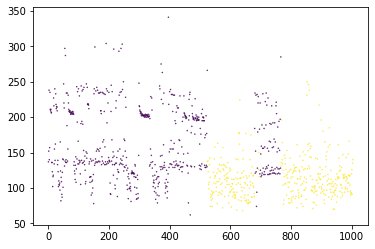

In [333]:
# -------- Plotter -------- #
# Plot a colour coded scatter plot representing either AF
# RR intervals or non-AF RR intervals

plt.scatter(RR_interval_index[:1000], RR_length[:1000], s=0.2, c=AF_truth_array[:1000])

In [334]:
# -------- Save the RR intervals as well as corresponding 'AF truth arrays' -------- #

# Export the RR interval lengths as a pickle file

# filename = '8434_RR_Interval_Length'

# This line uses pickle to save the segments array as a .pkl file

# with open('{}.pkl'.format(filename), 'wb') as f:
#      pickle.dump(RR_length, f)
# 
# filename_2 = '8434_AF_truth_array'

# with open('{}.pkl'.format(filename_2), 'wb') as f:
#     pickle.dump(AF_truth_array, f)
    
# filename_3 = '8434_RR_Interval_Length_Index'

# with open('{}.pkl'.format(filename_3), 'wb') as f:
#     pickle.dump(RR_interval_index, f)